In [4]:
# Import libraries
library(dplyr)
library(ggplot2)
library(gridExtra)


In [6]:
dataset = read.csv('Fat_Supply_Quantity_Data (1).csv', header=T, stringsAsFactors = F)

In [3]:
str(dataset)

ERROR: Error in str(dataset): object 'dataset' not found


## Preprocessing

In [5]:
#remove the last column
dataset=subset(dataset,select=-c(Unit..all.except.Population.))

## Missing Values

In [6]:
colSums(is.na(dataset))

Country      Alcoholic.Beverages          Animal.Products 
                       0                        0                        0 
             Animal.fats  Aquatic.Products..Other Cereals...Excluding.Beer 
                       0                        0                        0 
                    Eggs            Fish..Seafood  Fruits...Excluding.Wine 
                       0                        0                        0 
                    Meat            Miscellaneous  Milk...Excluding.Butter 
                       0                        0                        0 
                  Offals                 Oilcrops                   Pulses 
                       0                        0                        0 
                  Spices            Starchy.Roots               Stimulants 
                       0                        0                        0 
             Sugar.Crops       Sugar...Sweeteners                 Treenuts 
                       0                        0                        0 
        Vegetal.Products           Vegetable.Oils               Vegetables 
                       0                        0                        0 
                 Obesity           Undernourished                Confirmed 
                       3                        7                        6 
                  Deaths                Recovered                   Active 
                       6                        6                        8 
              Population 
                       0

In [7]:
dataset = na.omit(dataset) # na. omit returns the object with incomplete cases removed

In [8]:
sum(is.na(dataset))

[1] 0

In [9]:
dim(dataset) 

[1] 154  31

In [10]:
numeric.data <- select_if(dataset, is.numeric)


In [11]:
# correlation beyween numerical columns
M <-cor(numeric.data)

correlation=round(M,2)
correlation

,Alcoholic.Beverages,Animal.Products,Animal.fats,Aquatic.Products..Other,Cereals...Excluding.Beer,Eggs,Fish..Seafood,Fruits...Excluding.Wine,Meat,Miscellaneous,...,Treenuts,Vegetal.Products,Vegetable.Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
Alcoholic.Beverages,1.00,-0.07,-0.04,0.75,0.10,0.01,0.08,-0.05,-0.02,-0.07,...,-0.01,0.07,0.02,0.08,-0.15,-0.09,-0.08,-0.07,-0.04,-0.01
Animal.Products,-0.07,1.00,0.70,0.02,-0.45,0.47,-0.03,-0.12,0.73,0.12,...,0.16,-1.00,-0.68,0.11,0.45,0.50,0.45,0.41,0.27,0.01
Animal.fats,-0.04,0.70,1.00,0.00,-0.40,0.27,-0.11,-0.17,0.23,-0.07,...,0.15,-0.70,-0.38,-0.06,0.41,0.51,0.52,0.45,0.23,0.02
Aquatic.Products..Other,0.75,0.02,0.00,1.00,-0.09,0.09,0.13,-0.04,0.08,-0.03,...,0.05,-0.02,0.04,0.16,-0.12,-0.09,-0.09,-0.08,-0.05,0.13
Cereals...Excluding.Beer,0.10,-0.45,-0.40,-0.09,1.00,-0.30,-0.03,0.03,-0.26,-0.01,...,-0.21,0.45,-0.04,-0.03,-0.48,-0.44,-0.40,-0.33,-0.29,-0.01
Eggs,0.01,0.47,0.27,0.09,-0.30,1.00,0.23,-0.08,0.25,0.07,...,0.29,-0.47,-0.20,0.17,0.32,0.34,0.31,0.31,0.15,0.14
Fish..Seafood,0.08,-0.03,-0.11,0.13,-0.03,0.23,1.00,0.02,-0.02,0.46,...,0.18,0.03,-0.20,0.04,-0.22,-0.15,-0.22,-0.13,-0.06,-0.01
Fruits...Excluding.Wine,-0.05,-0.12,-0.17,-0.04,0.03,-0.08,0.02,1.00,-0.04,-0.03,...,-0.09,0.12,-0.07,0.04,-0.09,-0.08,-0.09,-0.06,-0.05,-0.04
Meat,-0.02,0.73,0.23,0.08,-0.26,0.25,-0.02,-0.04,1.00,0.14,...,-0.04,-0.73,-0.57,0.04,0.24,0.18,0.17,0.13,0.12,0.03
Miscellaneous,-0.07,0.12,-0.07,-0.03,-0.01,0.07,0.46,-0.03,0.14,1.00,...,0.13,-0.12,-0.17,-0.01,0.03,-0.06,-0.17,0.00,-0.09,-0.05


In [12]:
# show correlation between Obesity,Confirmed,Deaths and Recovered
data_corr=subset(dataset,select=c(Obesity,Confirmed,Deaths,Recovered))

In [13]:
cor(data_corr)

,Obesity,Confirmed,Deaths,Recovered
Obesity,1.0000000,0.5254964,0.4888412,0.4191795
Confirmed,0.5254964,1.0000000,0.8571638,0.8156346
Deaths,0.4888412,0.8571638,1.0000000,0.6588682
Recovered,0.4191795,0.8156346,0.6588682,1.0000000


### Using Multiple regression 

In [14]:
Obesity_na_data = dataset[is.na(dataset$Obesity), 2:24] # Indexing. is.na ...indicates which elements are missing.
# In a vector or column, NA values can be removed as follows:
 
Obesity_data = dataset[!is.na(dataset$Obesity), 2:25]

In [15]:
Obesity_lm = lm(Obesity ~ ., data = Obesity_data)  # We fit this model to 
summary(Obesity_lm)


Call:
lm(formula = Obesity ~ ., data = Obesity_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8936  -4.2896  -0.3001   4.3292  25.2037 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)               -933307     493582  -1.891   0.0609 .
Alcoholic.Beverages          9287       4934   1.882   0.0621 .
Animal.Products              9402       4930   1.907   0.0587 .
Animal.fats                  9264       4945   1.874   0.0632 .
Aquatic.Products..Other      9111       4961   1.837   0.0685 .
Cereals...Excluding.Beer     9346       4938   1.893   0.0606 .
Eggs                         9266       4945   1.874   0.0632 .
Fish..Seafood                9261       4945   1.873   0.0633 .
Fruits...Excluding.Wine      9348       4938   1.893   0.0606 .
Meat                         9264       4945   1.874   0.0632 .
Miscellaneous                9356       4939   1.894   0.0604 .
Milk...Excluding.Butter      9264       4945   1.874   0.06

In [16]:
#Choose a model by AIC in a Stepwise Algorithm
Obesity_step = step(Obesity_lm, scope = list(lower = ~ 1, upper = ~ .), direction = "both") # formula-based model by AIC.
summary(Obesity_step) 

# Scope is all the variables

Obesity_predict = predict(Obesity_step, newdata = Obesity_na_data)

Start:  AIC=628.09
Obesity ~ Alcoholic.Beverages + Animal.Products + Animal.fats + 
    Aquatic.Products..Other + Cereals...Excluding.Beer + Eggs + 
    Fish..Seafood + Fruits...Excluding.Wine + Meat + Miscellaneous + 
    Milk...Excluding.Butter + Offals + Oilcrops + Pulses + Spices + 
    Starchy.Roots + Stimulants + Sugar.Crops + Sugar...Sweeteners + 
    Treenuts + Vegetal.Products + Vegetable.Oils + Vegetables

                           Df Sum of Sq    RSS    AIC
<none>                                  6659.2 628.09
- Aquatic.Products..Other   1    172.81 6832.0 630.03
- Sugar...Sweeteners        1    177.89 6837.1 630.15
- Offals                    1    179.25 6838.4 630.18
- Fish..Seafood             1    179.70 6838.9 630.19
- Milk...Excluding.Butter   1    179.82 6839.0 630.19
- Meat                      1    179.83 6839.0 630.19
- Animal.fats               1    179.83 6839.0 630.19
- Eggs                      1    179.90 6839.1 630.19
- Alcoholic.Beverages       1    181.46 


Call:
lm(formula = Obesity ~ Alcoholic.Beverages + Animal.Products + 
    Animal.fats + Aquatic.Products..Other + Cereals...Excluding.Beer + 
    Eggs + Fish..Seafood + Fruits...Excluding.Wine + Meat + Miscellaneous + 
    Milk...Excluding.Butter + Offals + Oilcrops + Pulses + Spices + 
    Starchy.Roots + Stimulants + Sugar.Crops + Sugar...Sweeteners + 
    Treenuts + Vegetal.Products + Vegetable.Oils + Vegetables, 
    data = Obesity_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8936  -4.2896  -0.3001   4.3292  25.2037 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)               -933307     493582  -1.891   0.0609 .
Alcoholic.Beverages          9287       4934   1.882   0.0621 .
Animal.Products              9402       4930   1.907   0.0587 .
Animal.fats                  9264       4945   1.874   0.0632 .
Aquatic.Products..Other      9111       4961   1.837   0.0685 .
Cereals...Excluding.Beer     9346       4938   1.8

### Logistic Regression

In [17]:
#split_data
set.seed(123)
split_data <-sample(nrow(dataset),nrow(dataset)*0.7)
train=dataset[split_data,]
test=dataset[-split_data,]

### 1) Deaths~ Obesity

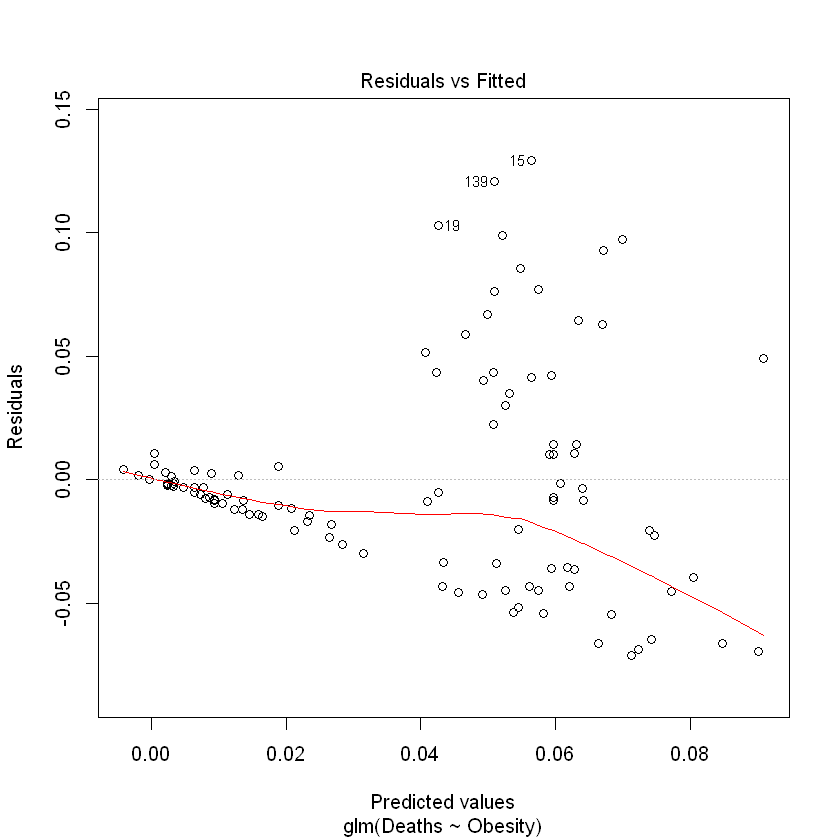

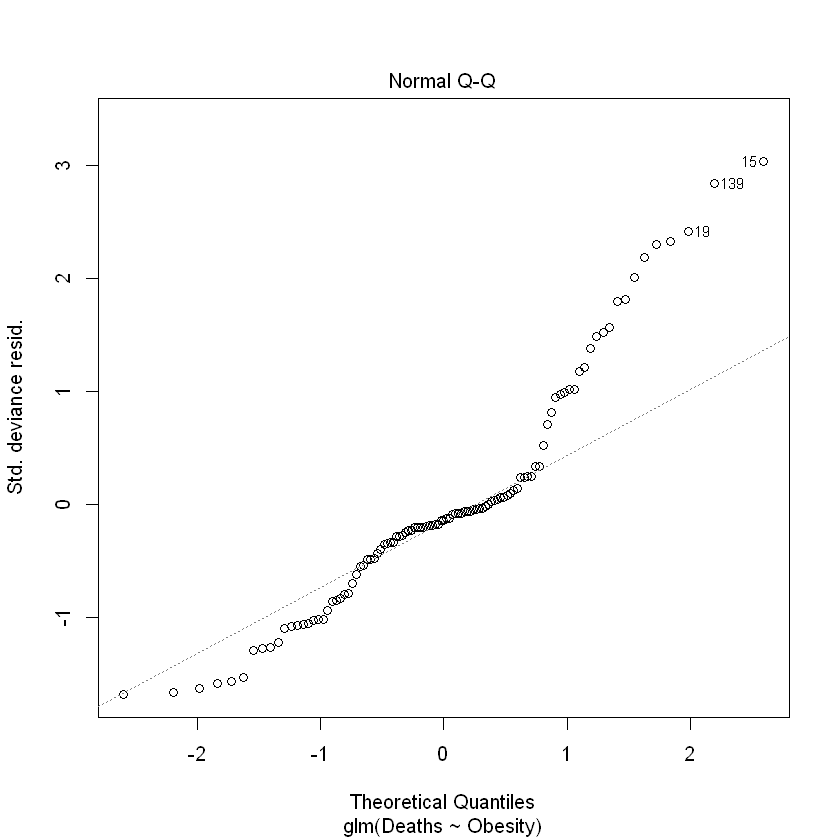

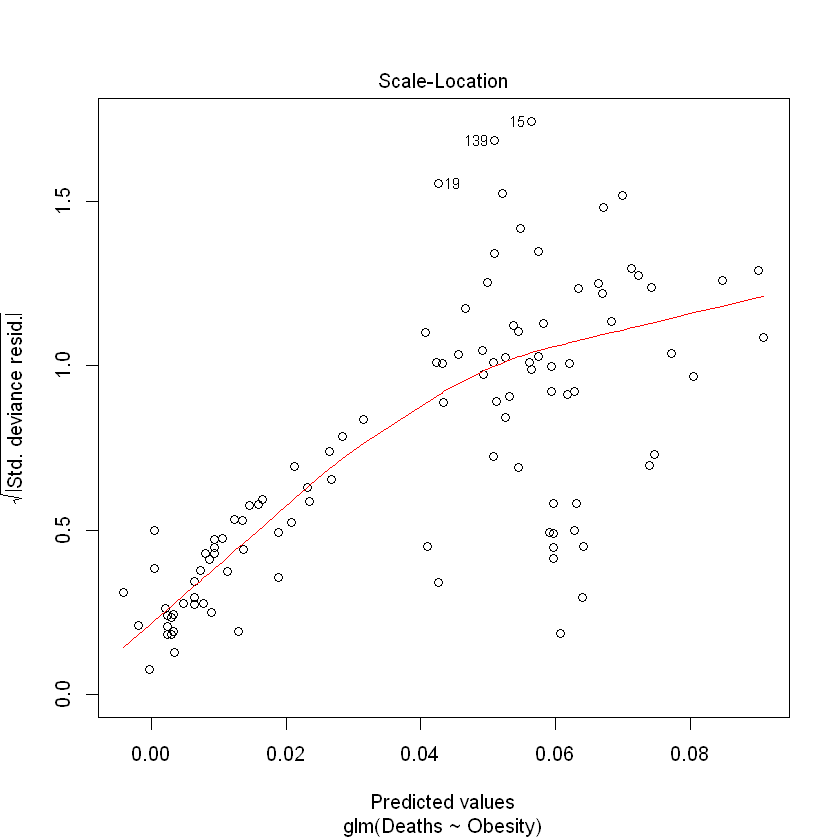

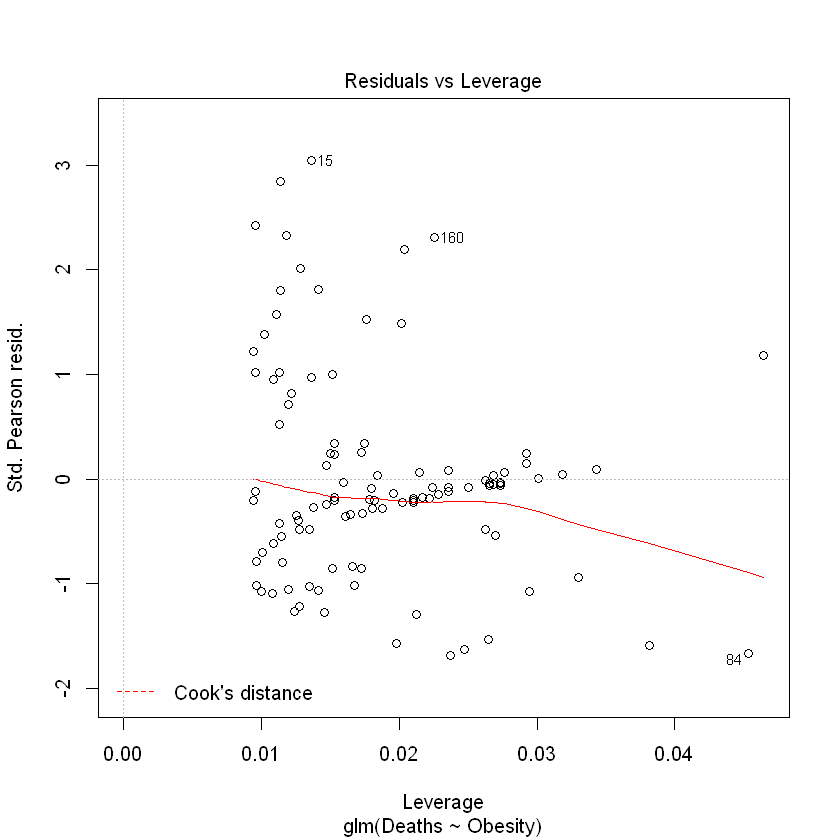

In [18]:
glm.fit <- glm(Deaths~ Obesity, data = train)
plot(glm.fit)

In [19]:
pred=predict(glm.fit,test)
sqrt(mean((pred-test$Deaths)^2))

[1] 0.04410528

### 2) Recovered~ Obesity

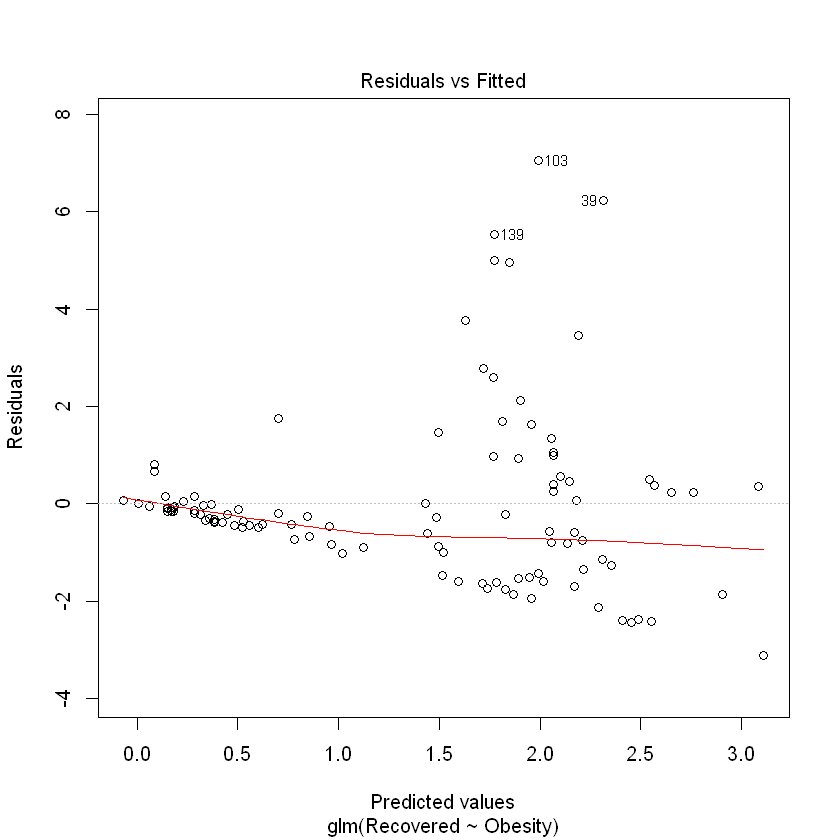

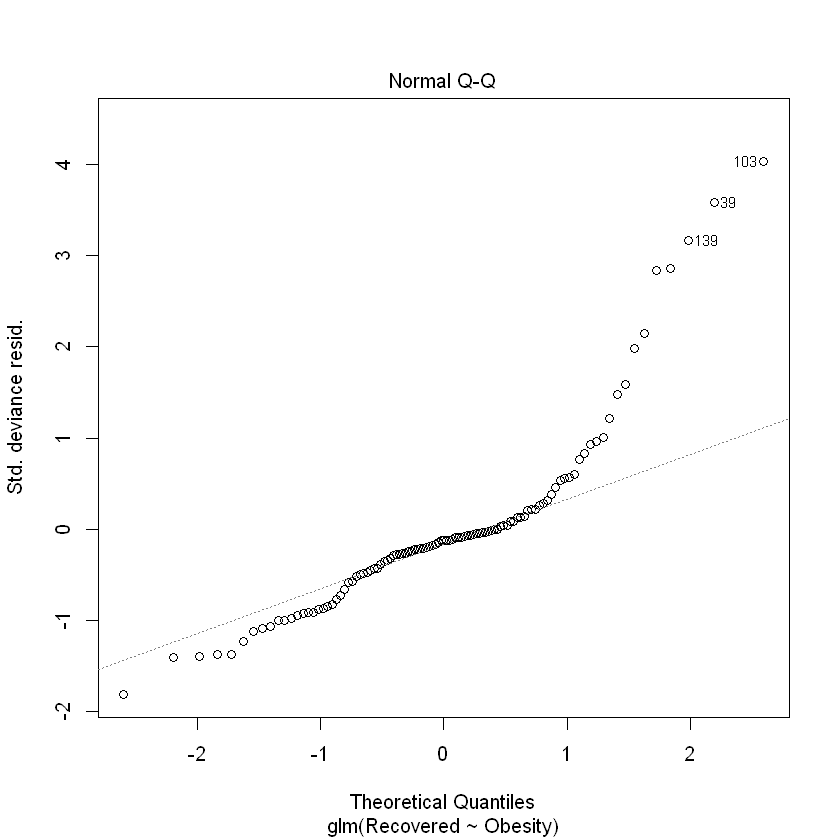

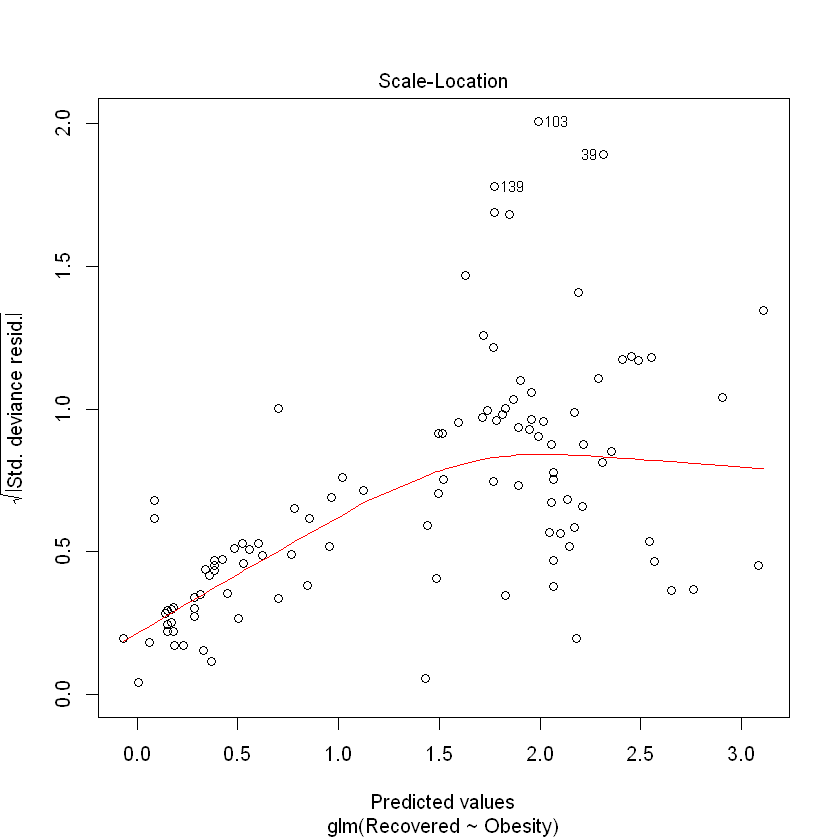

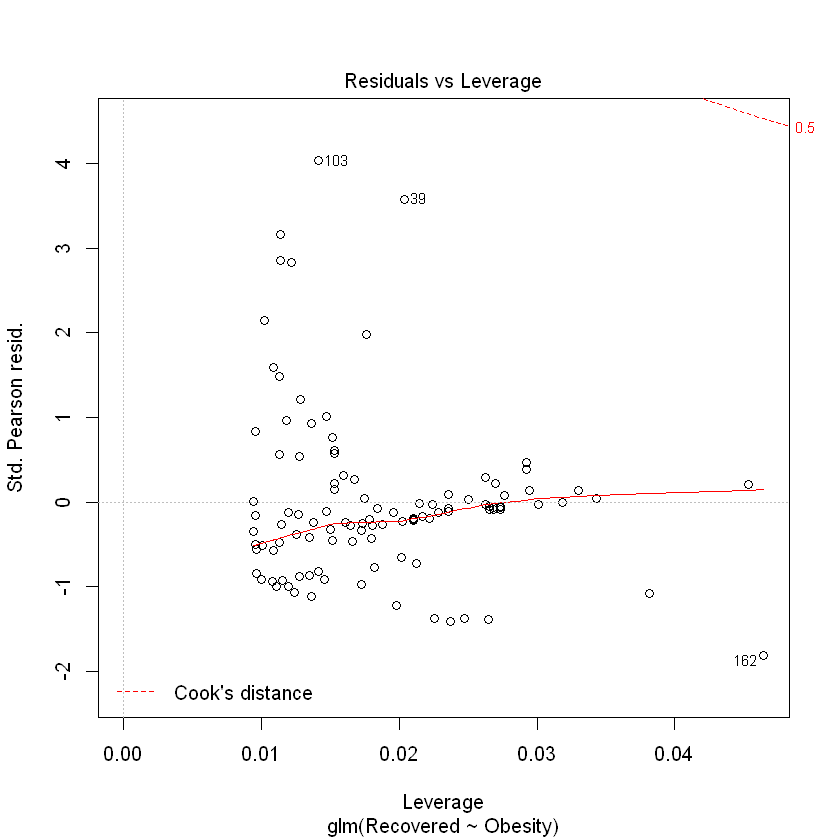

In [21]:
glm.fit <- glm(Recovered~ Obesity, data = train)
plot(glm.fit)

In [22]:
pred=predict(glm.fit,test)
sqrt(mean((pred-test$Deaths)^2))

[1] 1.664517

### 3) Confirmed~ Obesity

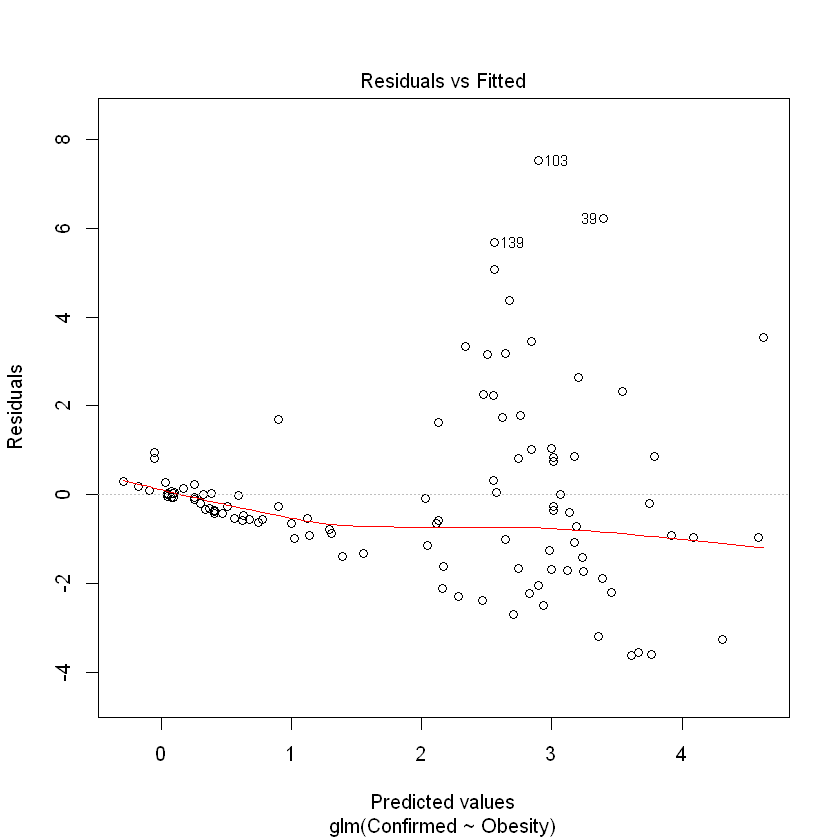

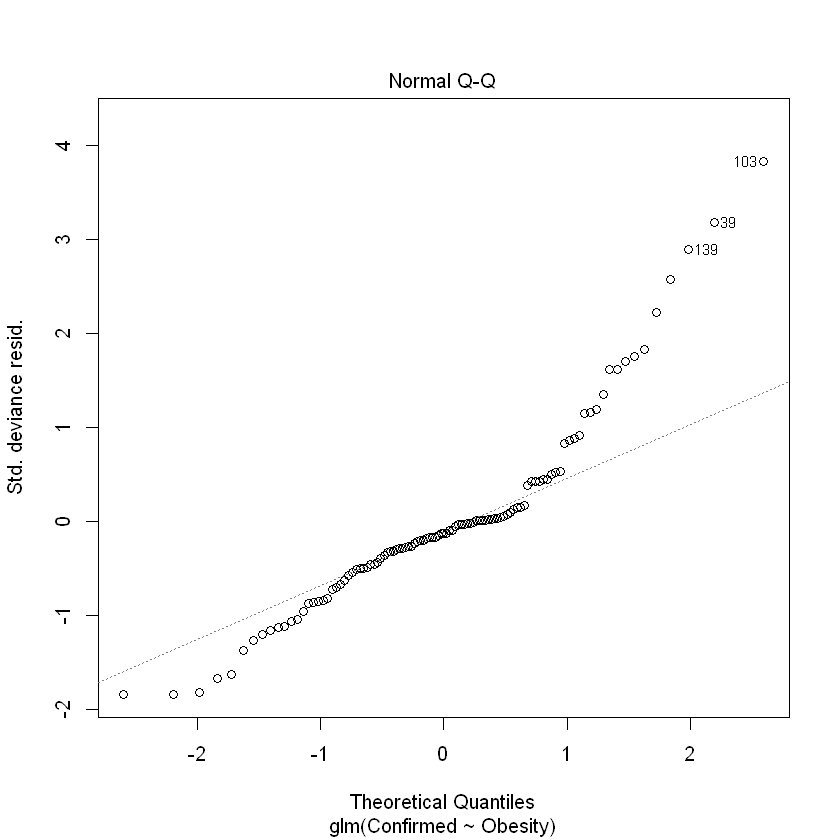

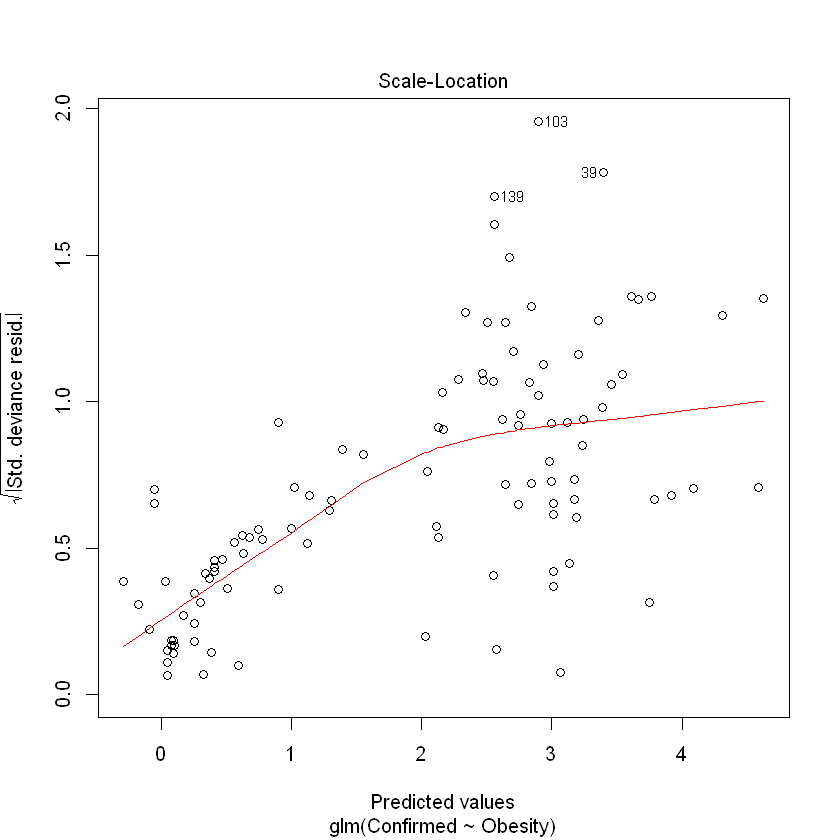

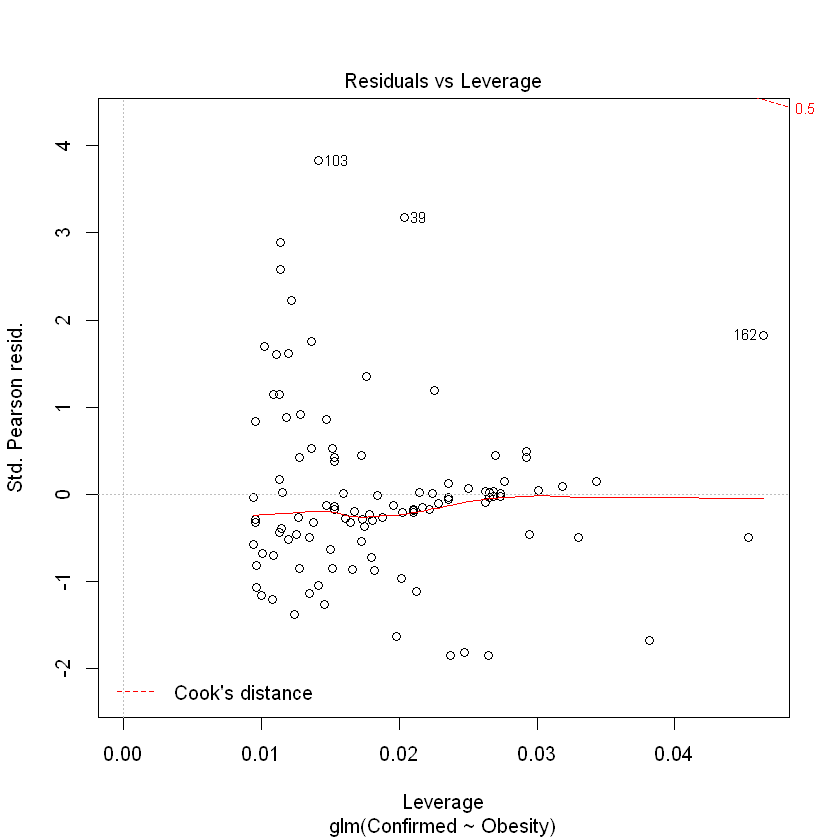

In [23]:
glm.fit <- glm(Confirmed~ Obesity, data = train)
#summary(glm.fit)
plot(glm.fit)

In [24]:
pred=predict(glm.fit,test)
sqrt(mean((pred-test$Deaths)^2))

[1] 2.43801

## Decision tree

In [25]:
library(rpart)
fit <- rpart(Recovered~ Obesity, 
             method = "anova", data = train)

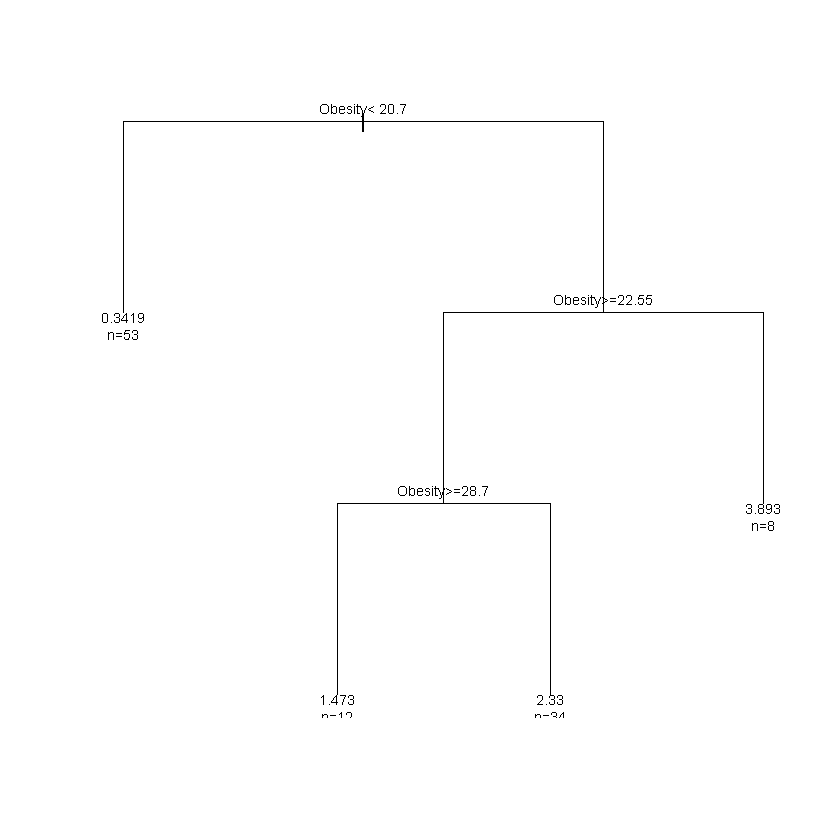

In [26]:
plot(fit, uniform = TRUE)
text(fit, use.n = TRUE, cex = .7)


Regression tree:
rpart(formula = Recovered ~ Obesity, data = train, method = "anova")

Variables actually used in tree construction:
[1] Obesity

Root node error: 407.14/107 = 3.805

n= 107 

        CP nsplit rel error  xerror    xstd
1 0.270565      0   1.00000 1.01482 0.23285
2 0.053438      1   0.72943 0.79720 0.17980
3 0.016022      2   0.67600 0.91059 0.20673
4 0.010000      3   0.65997 0.95526 0.21483
Call:
rpart(formula = Recovered ~ Obesity, data = train, method = "anova")
  n= 107 

          CP nsplit rel error    xerror      xstd
1 0.27056521      0 1.0000000 1.0148216 0.2328539
2 0.05343808      1 0.7294348 0.7972021 0.1798023
3 0.01602234      2 0.6759967 0.9105924 0.2067280
4 0.01000000      3 0.6599744 0.9552620 0.2148321

Variable importance
Obesity 
    100 

Node number 1: 107 observations,    complexity param=0.2705652
  mean=1.366115, MSE=3.805047 
  left son=2 (53 obs) right son=3 (54 obs)
  Primary splits:
      Obesity < 20.7  to the left,  improve=0.2705652, (

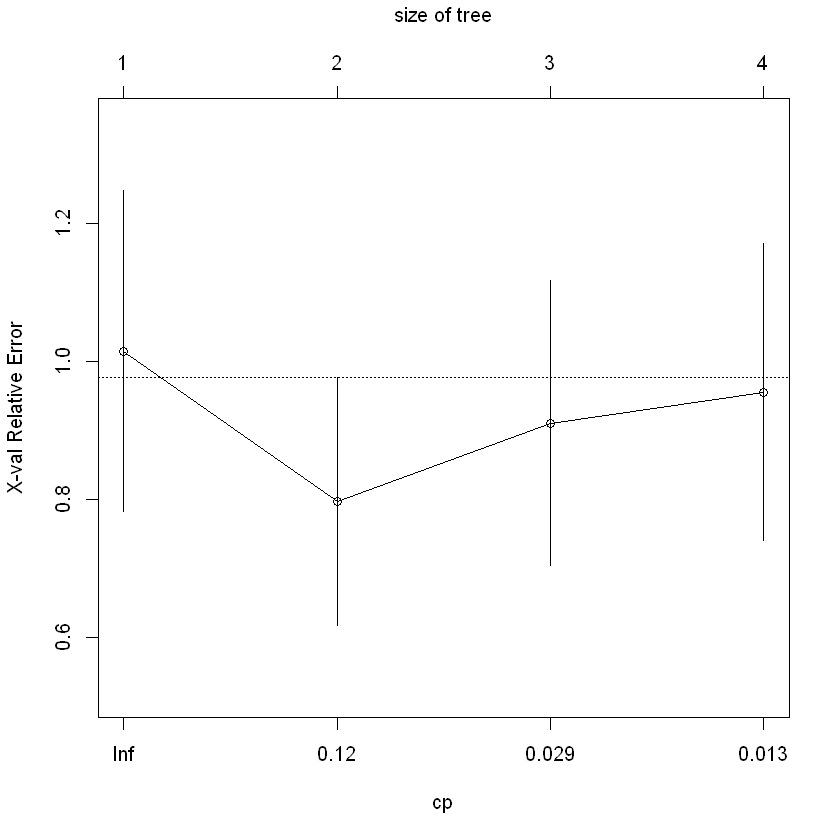

In [27]:
printcp(fit) # display the results
plotcp(fit) # visualize cross-validation results
summary(fit) # detailed summary of splits

## Evaluation with Mean Squar Error

In [28]:
pred=predict(fit,test)

In [29]:
sqrt(mean((pred-test$Recovered)^2))

[1] 1.750742